In [82]:
import pandas as pd
import matplotlib.pyplot as plt

In [88]:
#Define the case and nb clusters 
case = "3-bus"
nbc = 10

In [89]:
#Read the relevant data 

#For net demand
df_dem_gen = pd.read_csv(f"D.Representative_days_based_on_RES_and_Demand/{case}/2.Par/oT_Data_Profiles_{case}.csv")
df_dem_gen["Net_demand"] = df_dem_gen["Demand"] -df_dem_gen["Solar"]-df_dem_gen["Wind"]-df_dem_gen["Hydro"]

#For line benefits 
df_LB = pd.read_csv(f"E.Representative_days_based_on_Line_Benefits_OptModel/{case}/3.Out/oT_LineBenefit_Data_{case}.csv")
df_LB.drop(df_LB.columns[0], axis=1, inplace=True)
df_LB["LB sum"] = df_LB.sum(axis = 1)

#For the clusters 
df_clusters_1 = pd.read_csv(f"E.Representative_days_based_on_Line_Benefits_OptModel/{case}_ByStages_nc{nbc}/2.Par/oT_Data_Duration_{case}_ByStages_nc{nbc}.csv")
df_clusters_2 = pd.read_csv(f"D.Representative_days_based_on_RES_and_Demand/{case}_ByStages_nc{nbc}/2.Par/oT_Data_Duration_{case}_ByStages_nc{nbc}.csv")

cluster_names_1 = df_clusters_1["Stage"].unique()
cluster_names_2 = df_clusters_2["Stage"].unique()

color_map_1 = plt.cm.get_cmap('viridis', len(cluster_names_1))
category_colors_1 = {category: color_map_1(i) for i, category in enumerate(cluster_names_1)}

color_map_2 = plt.cm.get_cmap('viridis', len(cluster_names_2))
category_colors_2 = {category: color_map_1(i) for i, category in enumerate(cluster_names_2)}

df_colors = pd.DataFrame()
df_colors["LB"] = df_clusters_1['Stage'].map(category_colors_1)
df_colors["R&D"] = df_clusters_2['Stage'].map(category_colors_2)

C:\Users\u0138303\AppData\Local\Temp\ipykernel_27452\2113219641.py:19: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_map_1 = plt.cm.get_cmap('viridis', len(cluster_names_1))
C:\Users\u0138303\AppData\Local\Temp\ipykernel_27452\2113219641.py:22: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_map_2 = plt.cm.get_cmap('viridis', len(cluster_names_2))


In [90]:
print("Number of cluster names,", "LB: ",len(cluster_names_1),",","R&D: ",len(cluster_names_2))
print("Number of colors", "LB: ",len(df_colors["LB"].unique()),",","R&D: ",len(df_colors["R&D"].unique()))

Number of cluster names, LB:  11 , R&D:  11
Number of colors LB:  11 , R&D:  11


Text(0.5, 0, 'Net demand')

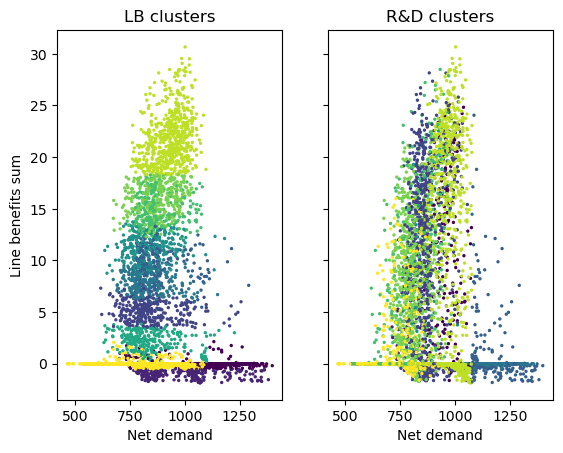

In [91]:
fig, axs = plt.subplots(1,2,sharey = True,sharex = True)
axs[0].scatter(x= df_dem_gen["Net_demand"],y=df_LB["LB sum"],c = df_colors["LB"],s = 2)
axs[1].scatter(x= df_dem_gen["Net_demand"],y=df_LB["LB sum"],c = df_colors["R&D"],s = 2)

axs[0].set_title("LB clusters")
axs[1].set_title("R&D clusters")
axs[0].set_ylabel("Line benefits sum")
axs[1].set_xlabel("Net demand")
axs[0].set_xlabel("Net demand")

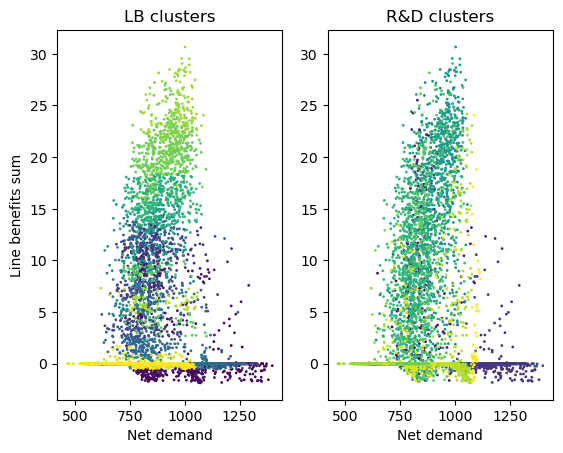

In [87]:
fig,axs = plt.subplots(1,2)
threshold = 40  # Adjust this threshold to your desired value
threshold_min = -25
# Filtering out data points above the threshold for the first plot
filtered_data_0 = df_LB[(df_LB["LB sum"] < threshold)&(df_LB["LB sum"] > threshold_min)]
axs[0].scatter(x=df_dem_gen.loc[filtered_data_0.index, "Net_demand"], y=filtered_data_0["LB sum"], c=df_colors.loc[filtered_data_0.index, "LB"],s =1)

# Filtering out data points above the threshold for the second plot
filtered_data_1 = df_LB[(df_LB["LB sum"] < threshold)&(df_LB["LB sum"] > threshold_min)]
axs[1].scatter(x=df_dem_gen.loc[filtered_data_1.index, "Net_demand"], y=filtered_data_1["LB sum"], c=df_colors.loc[filtered_data_1.index, "R&D"],s = 1)

axs[0].set_title("LB clusters")
axs[1].set_title("R&D clusters")
axs[0].set_ylabel("Line benefits sum")
axs[1].set_xlabel("Net demand")
axs[0].set_xlabel("Net demand")

plt.show()

Text(0.5, 1.0, 'R&D clusters')

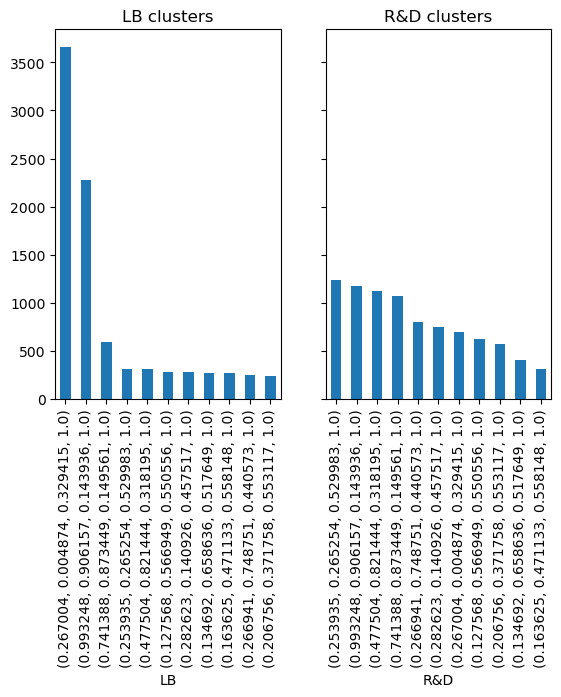

In [92]:
fig,axs = plt.subplots(1,2,sharey = True)
df_colors.LB.value_counts().plot(kind='bar',ax = axs[0])
df_colors["R&D"].value_counts().plot(kind='bar',ax = axs[1])
axs[0].set_title("LB clusters")
axs[1].set_title("R&D clusters")